In [39]:
#Import required libraries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from datetime import datetime, date
import calendar
import time

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/user/Desktop/CODING/OHIO analysis/Ohio_544_cluster_parameters.csv')

In [25]:
data = data.dropna()

data

,Day Name,Day number,week of experiment,Time period Name,Time period number,iAUC (+ve),iAUC (-ve),Glucose Excursion (+ve),Glucose Excursion (-ve),Total raise in glucose (+ve),Total raise in glucose (-ve),Peak Value,Carbs,Cluster
0,Monday,1,1,Breakfast,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,13
1,Tuesday,2,1,Breakfast,1,44.25,-322.25,0.04,-0.05,1.40,-7.30,1.80,0.0,2
2,Wednesday,3,1,Breakfast,1,72.00,-273.75,0.06,-0.03,4.80,-4.70,4.80,37.0,2
3,Thursday,4,1,Breakfast,1,86.50,-93.00,0.09,-0.02,6.00,-2.80,6.00,37.0,2
4,Friday,5,1,Breakfast,1,127.50,-237.25,0.08,-0.03,6.10,-5.60,6.10,37.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Wednesday,3,9,Overnight,4,1.90,-6.81,0.02,-0.20,31.17,-3.17,3.17,0.0,0
248,Thursday,4,9,Overnight,4,1.85,-350.60,0.00,-0.02,0.00,-2.78,0.00,0.0,3
249,Friday,5,9,Overnight,4,2.91,8.06,0.50,-2.73,6.33,-8.44,8.44,0.0,5
250,Saturday,6,9,Overnight,4,0.82,-59.03,0.00,0.04,0.00,0.00,0.00,0.0,3


In [5]:
'initial_nadir_glucose', 'initial_nadir_time', 'peak_glucose', 'peak_time', 'secondary_nadir_glucose', 'secondary_nadir_time', 'positive_excursion', 'negative_excursion', 'positive_iAUC', 'negative_iAUC', 'day_names', 'time_of_day', 'day_number', 'week_of_experiment', 'carbs_g', 'meal_type'

('initial_nadir_glucose',
 'initial_nadir_time',
 'peak_glucose',
 'peak_time',
 'secondary_nadir_glucose',
 'secondary_nadir_time',
 'positive_excursion',
 'negative_excursion',
 'positive_iAUC',
 'negative_iAUC',
 'day_names',
 'time_of_day',
 'day_number',
 'week_of_experiment',
 'carbs_g',
 'meal_type')

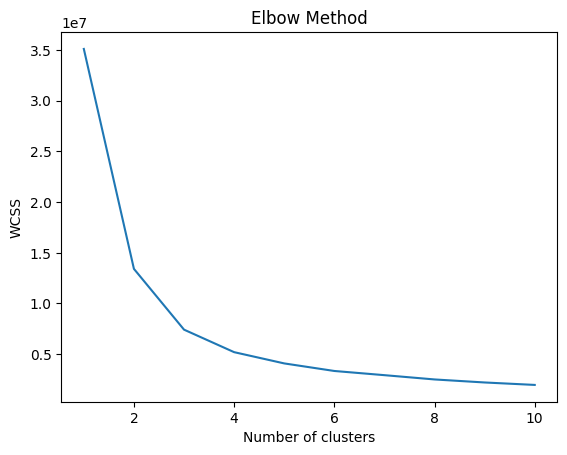

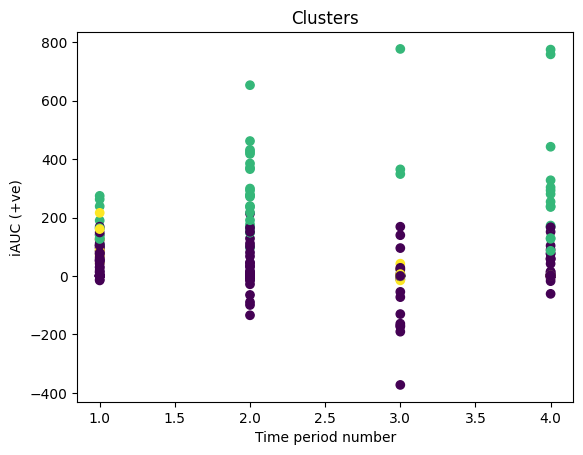

In [6]:
# Select the features to use for clustering
X = data[['Time period number', 'iAUC (+ve)', 'iAUC (-ve)', 'Glucose Excursion (+ve)', 'Glucose Excursion (-ve)', 'Total raise in glucose (+ve)', 'Total raise in glucose (-ve)', 'Peak Value', 'Carbs']]

# Use the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, select the optimal number of clusters (in this case, let's say it's 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred_y)
plt.title('Clusters')
plt.xlabel('Time period number')
plt.ylabel('iAUC (+ve)')
plt.show()

/var/folders/9p/vwhkd5c50_j5cz3cyj0q4qsh0000gp/T/ipykernel_83373/179640533.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(square_dist_matrix, method='ward')


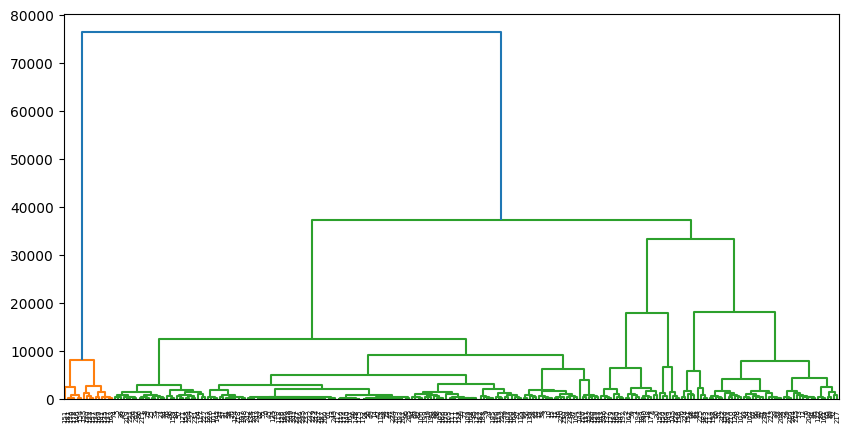

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

clustering_data = data[['Time period number', 'iAUC (+ve)', 'iAUC (-ve)', 'Glucose Excursion (+ve)', 'Glucose Excursion (-ve)', 'Total raise in glucose (+ve)', 'Total raise in glucose (-ve)', 'Peak Value', 'Carbs']]
dist_matrix = pdist(clustering_data)
square_dist_matrix = squareform(dist_matrix)

# compute linkage matrix using Ward's method
Z = linkage(square_dist_matrix, method='ward')

# create a list of labels
labels = list(range(len(clustering_data)))

# plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=labels)
plt.show()

In [26]:
# Select the features for clustering
clustering_data = data[['Time period number', 'iAUC (+ve)', 'iAUC (-ve)', 'Glucose Excursion (+ve)', 'Glucose Excursion (-ve)', 'Total raise in glucose (+ve)', 'Total raise in glucose (-ve)', 'Peak Value', 'Carbs']].values

In [27]:
# Standardize the features

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

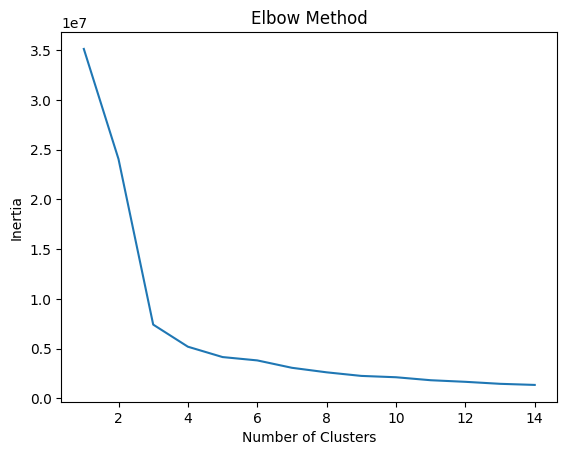

In [28]:
# Set number of Clusters 

no_clusters= range(1,15) 
inertia =[]

for i in no_clusters:
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(clustering_data)
    inertia.append(k_means.inertia_)
    
plt.plot(no_clusters, inertia)
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=15, random_state=10)
kmeans = kmeans.fit(clustering_data)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(clustering_data)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,15)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4", "Cluster 5","Cluster 6","Cluster 7","Cluster 8","Cluster 9", "Cluster 10","Cluster 11","Cluster 12","Cluster 13","Cluster 14"])

# display
countscldf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14
0,4,20,7,7,10,16,60,11,14,31,24,8,11,22,5


In [29]:
# fit KMeans clustering model with the optimal number of clusters
n_clusters = 15  # based on elbow method plot
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=10)
y_kmeans = kmeans.fit_predict(clustering_data_scaled)

In [30]:
# evaluate the quality of the clustering using the Silhouette score
silhouette_avg = silhouette_score(clustering_data_scaled, y_kmeans)
print("Silhouette score for clustering with {} clusters: {}".format(n_clusters, silhouette_avg))

Silhouette score for clustering with 15 clusters: 0.31013542604422434


In [31]:
# add the cluster labels to the original dataset
data['Cluster'] = y_kmeans

In [32]:
# print the mean values of each feature by cluster label
print(data.groupby('Cluster').mean())

         Day number  week of experiment  Time period number  iAUC (+ve)  \
Cluster                                                                   
0          3.600000            5.466667            3.533333  245.820000   
1          3.625000            5.150000            2.425000  -17.841500   
2          3.809524            4.690476            1.023810  109.788810   
3          4.325000            5.200000            3.775000   -1.736750   
4          4.000000            3.090909            2.090909  340.613636   
5          6.000000            6.500000            3.500000  -83.545000   
6          3.928571            3.571429            3.071429    0.339286   
7          4.500000            4.363636            2.136364  133.979545   
8          5.000000            6.500000            2.500000   52.585000   
9          5.000000            8.000000            1.000000  -12.500000   
10         5.750000            5.500000            3.250000  740.832500   
11         5.000000      

/var/folders/9p/vwhkd5c50_j5cz3cyj0q4qsh0000gp/T/ipykernel_83373/2346454787.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('Cluster').mean())


Explained variance ratio (first two components): [8.61891258e-01 1.23966731e-01 1.38181680e-02 2.51351664e-04
 5.12594056e-05 1.24833076e-05 7.67194550e-06 6.56673020e-07]


<Figure size 640x480 with 0 Axes>

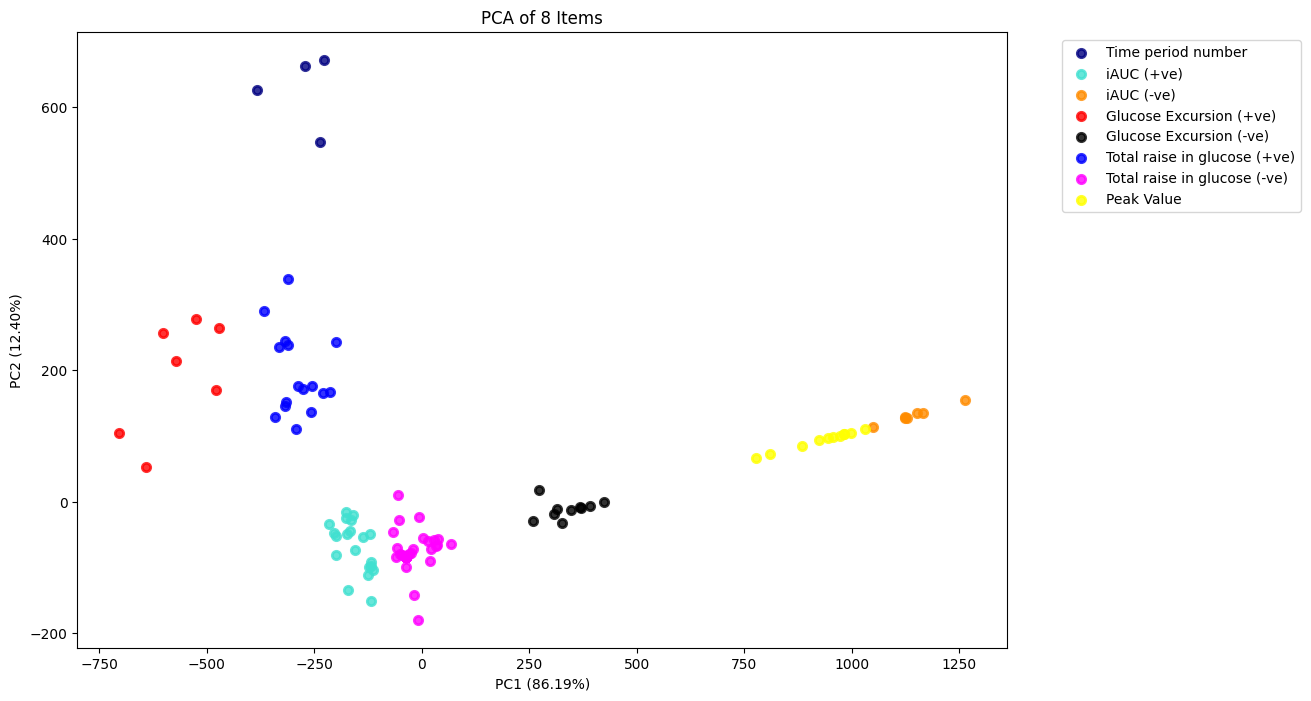

In [34]:
# Running PCA and pacmap to Visualize the data
# Utilizing the features in the clustering_data matrix. 
# The matrix includes the following features:

#Time period number
#iAUC (+ve)
#iAUC (-ve)
#Glucose Excursion (+ve)
#Glucose Excursion (-ve)
#Total raise in glucose (+ve)
#Total raise in glucose (-ve)
#Peak Value
#Carbs

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#import pacmap

X = clustering_data
y_num = predictions

feature_names = ['Time period number', 'iAUC (+ve)', 'iAUC (-ve)', 'Glucose Excursion (+ve)', 'Glucose Excursion (-ve)', 'Total raise in glucose (+ve)', 'Total raise in glucose (-ve)', 'Peak Value', 'Carbs']

pca = PCA(n_components=8, random_state = 42) #n_components utilizes the first n number of aspects in the matrix
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black', 'blue', 'magenta', 'yellow']#, 'green', 'pink', 'cyan', 'lime', 'indigo', 'salmon', 'slategray']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], feature_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.xlabel('PC1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('PCA of 8 Items')
plt.show()

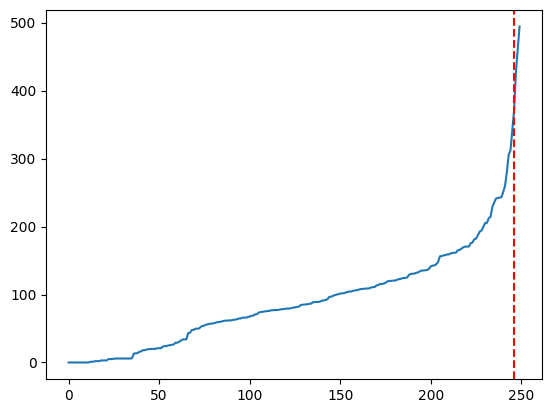

In [55]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculate the k-distances for each point
k = 12
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances and plot them
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)

# Find the "elbow" in the plot
elbow_index = np.argmax(np.diff(distances))
optimal_eps = distances[elbow_index]
plt.axvline(x=elbow_index, color='r', linestyle='--')
plt.show()

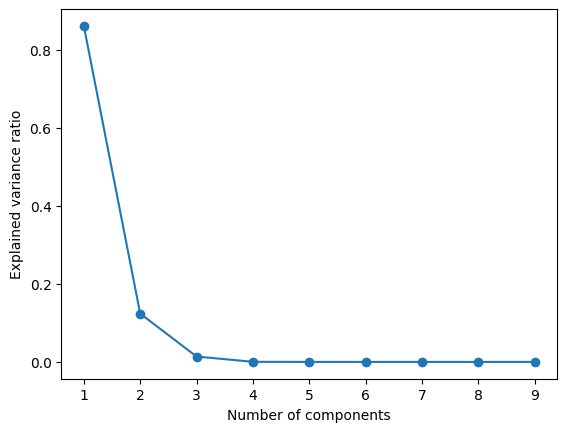

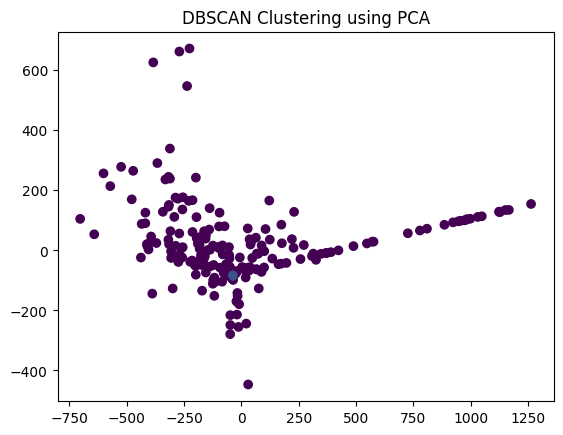

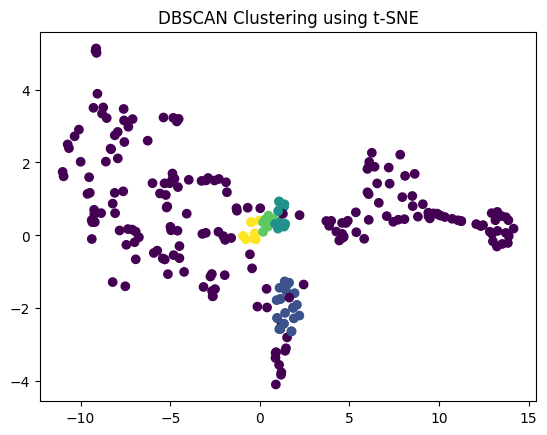

In [69]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Data
X = clustering_data

pca = PCA()
pca.fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=9, min_samples=5)
clusters = dbscan.fit_predict(X)

# Reduce the dimensionality of the data to 2D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Reduce the dimensionality of the data to 2D using t-SNE
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

# Plot the clusters in the reduced space using PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.title('DBSCAN Clustering using PCA')
plt.show()

# Plot the clusters in the reduced space using t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters)
plt.title('DBSCAN Clustering using t-SNE')
plt.show()

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]
The average silhouette_score is : 0.6889773256303615


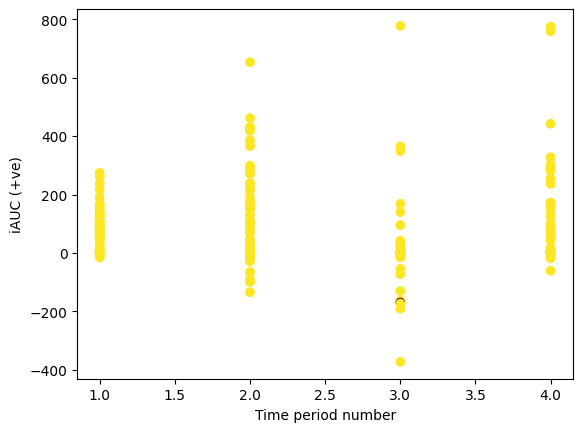

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = clustering_data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose Hyperparameters
eps = 9
min_samples = 5

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# Print the clusters assigned to each data point
print(clusters)

# Calculate silhouette score for the clustering output
silhouette_avg = silhouette_score(X_scaled, clusters)
print("The average silhouette_score is :", silhouette_avg)

# Create a scatter plot with different colors for each cluster
#plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
#plt.xlabel('Time period number')
#plt.ylabel('iAUC (+ve)')
#plt.show()